In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
main_url = "https://www.newsbeast.gr/page/"

teaser_soups_list = []

for i in range(5, 10):
  page_url = main_url + str(i)
  page = requests.get(page_url)
  teaser_soup = BeautifulSoup(page.text, 'html.parser')
  print(f"Now Scraping page: {i}")
  teaser_soups_list.append(teaser_soup)
  time.sleep(2)

Now Scraping page: 5
Now Scraping page: 6
Now Scraping page: 7
Now Scraping page: 8
Now Scraping page: 9


In [ ]:
#print(teaser_soup.prettify())

In [ ]:
teaser_soups_list[0].find_all('div', {'class': 'jsx-107431441 articleDisplay'})

In [ ]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('h4').find('a').text

'Ζοζέπ Μπορέλ: Η Ρωσία δεν θα διαπραγματευτεί όσο προσπαθεί να κερδίσει τον πόλεμο στην Ουκρανία'

In [ ]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('h4').find('a')['href']

'/world/arthro/9716500/zozep-borel-i-rosia-den-tha-diapragmateftei-oso-prospathei-na-kerdisei-ton-polemo-stin-oukrania'

In [ ]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('a', {'class':'subtitle'}).text

'Ο επικεφαλής της ευρωπαϊκής δήλωσε ότι «δεν είναι αισιόδοξος»'

In [ ]:
teaser_soups_list[0].find('div', {'class': 'jsx-107431441 articleDisplay'}).find('time').text

'29/05/2023 19:35'

In [ ]:
teaser_articles_list = []
for teaser_soup in teaser_soups_list:
  teaser_articles = teaser_soup.find_all('div', {'class': 'jsx-107431441 articleDisplay'})
  for teaser_article in teaser_articles:
    teaser_article_dict = {}
    h4_a = teaser_article.find('h4').find('a')
    if h4_a:
      teaser_article_dict['Title'] = h4_a.text
      teaser_article_dict['Url'] = h4_a['href']
    lead = teaser_article.find('a')
    if lead:
      teaser_article_dict['Lead'] = lead.text
    section = teaser_article.find('a', {'class': 'category'})
    if section:
      teaser_article_dict['Section'] = section.text
    datetime = teaser_article.find('time')
    if datetime:
      teaser_article_dict['Datetime'] = datetime.text
    teaser_articles_list.append(teaser_article_dict)

# Δημιουργία του dataframe
news_beast_teaser_articles_df = pd.DataFrame(teaser_articles_list)
news_beast_teaser_articles_df.to_csv("news.csv", index=False)
news_beast_teaser_articles_df


Title  \
0                            Ζοζέπ Μπορέλ: Η Ρωσία δεν θα διαπραγματευτεί όσο προσπαθεί να κερδίσει τον πόλεμο στην Ουκρανία   
1                  Survivor All Star: Σπόντες Καραγκούνια για την Μαριαλένα – «Εκεί είναι η πόρτα, την ανοίγεις και φεύγεις»   
2    Fake news και διχασμός με τη βοήθεια τεχνητής νοημοσύνης: Ο φόβος των Αμερικανών ενόψει των Προεδρικών Εκλογών του 2024   
3                                       Αυτή είναι η χώρα με τα περισσότερα νησιά στον κόσμο – Η θέση που βρίσκεται η Ελλάδα   
4                                                                    Ο καγκελάριος Σολτς προσκαλεί τον Ερντογάν στο Βερολίνο   
..                                                                                                                       ...   
239                              Survivor All Star: Ξέσπασε η Σταυρούλα για τον Μαρτίκα – «Με ενοχλεί πάρα πολύ σαν γυναίκα»   
240                                            «Σαρώνει» στην Ελλάδα ο Ολυμπιακός – Υπογράφουν διεθνή γκαρντ οι Αγγελόπουλοι   
241     Κουκουλοφόροι έκανα «γυαλιά καρφιά» το σταθμό του ΗΣΑΠ στο Θησείο – Πέταξαν μπογιές και έσπασαν ακυρωτικά μηχανήματα   
242                        Τουρκία εκλογές: Υποστηρικτές του Ερντογάν πανηγύρισαν τη νίκη του Σουλτάνου μέσα στην Αγία Σοφία   
243      Εξαφάνιση μυστήριο στη Θεσσαλονίκη: 43χρονος τηλεφώνησε στο «100» ζητώντας βοήθεια και αργότερα βρέθηκε στη Χαλκίδα   

                                                                                                                                                       Url  \
0                                    /world/arthro/9716500/zozep-borel-i-rosia-den-tha-diapragmateftei-oso-prospathei-na-kerdisei-ton-polemo-stin-oukrania   
1                                /media/arthro/9716503/survivor-all-star-spontes-karagkounia-gia-tin-marialena-ekei-einai-i-porta-tin-anoigeis-kai-fevgeis   
2    /technology/arthro/9716337/fake-news-kai-dichasmos-me-ti-voitheia-technitis-noimosynis-o-fovos-ton-amerikanon-enopsei-ton-proedrikon-eklogon-tou-2024   
3                                              /travel/arthro/9716333/afti-einai-i-chora-me-ta-perissotera-nisia-ston-kosmo-i-thesi-pou-vrisketai-i-ellada   
4                                                                            /world/arthro/9716433/o-kagkelarios-solts-proskalei-ton-erntogan-sto-verolino   
..                                                                                                                                                     ...   
239                                          /media/arthro/9713110/survivor-all-star-xespase-i-stavroula-gia-ton-martika-me-enochlei-para-poly-san-gynaika   
240                                                       /sports/arthro/9713089/saronei-stin-ellada-o-olybiakos-ypografoun-diethni-gkarnt-oi-angelopouloi   
241              /greece/arthro/9713086/koukouloforoi-ekana-gyalia-karfia-to-stathmo-tou-isap-sto-thiseio-petaxan-bogies-kai-espasan-akyrotika-michanimata   
242                                 /world/arthro/9713088/tourkia-ekloges-ypostiriktes-tou-erntogan-panigyrisan-ti-niki-tou-soultanou-mesa-stin-agia-sofia   
243           /greece/arthro/9713076/exafanisi-mystirio-sti-thessaloniki-43chronos-tilefonise-sto-100-zitontas-voitheia-kai-argotera-vrethike-sti-chalkida   

                                                                                                                        Lead  \
0                            Ζοζέπ Μπορέλ: Η Ρωσία δεν θα διαπραγματευτεί όσο προσπαθεί να κερδίσει τον πόλεμο στην Ουκρανία   
1                  Survivor All Star: Σπόντες Καραγκούνια για την Μαριαλένα – «Εκεί είναι η πόρτα, την ανοίγεις και φεύγεις»   
2    Fake news και διχασμός με τη βοήθεια τεχνητής νοημοσύνης: Ο φόβος των Αμερικανών ενόψει των Προεδρικών Εκλογών του 2024   
3                                       Αυτή είναι η χώρα με τα περισσότερα νησιά στον κόσμο – Η θέση που βρίσκεται η Ελλάδα   
4                                            

In [ ]:
#!python -m spacy download el_core_news_sm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as Datetime

from google.colab import drive
drive.mount('gdrive')

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
news_beast_teaser_articles_df = pd.read_csv("/content/news.csv")
news_beast_teaser_articles_df

In [ ]:
print(news_beast_teaser_articles_df.shape)
print(f"dtype of 'Datetime' is: {news_beast_teaser_articles_df.Datetime.dtypes}. To θέλουμε σε datetime64[ns]") #
news_beast_teaser_articles_df.head(1)


In [ ]:
news_beast_teaser_articles_df.dtypes

In [ ]:
news_beast_teaser_articles_df[news_beast_teaser_articles_df['Datetime'].str.contains('Upd')]

In [ ]:
news_beast_teaser_articles_df['Datetime']=news_beast_teaser_articles_df['Datetime'].str.replace('Upd: ', '')

In [ ]:
news_beast_teaser_articles_df['Datetime'] = pd.to_datetime(news_beast_teaser_articles_df.Datetime , format='%d/%m/%Y %H:%M')

In [ ]:
news_beast_teaser_articles_df.dtypes

Title               object
Url                 object
Lead                object
Section             object
Datetime    datetime64[ns]
dtype: object

In [ ]:
# Make a dataframe with selected columns only
news_beast_articles_df = news_beast_teaser_articles_df[['Title','Datetime']]

# Extract year, month and day from daytime
news_beast_articles_df['year'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).year
news_beast_articles_df['month'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).month
news_beast_articles_df['day'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).day
news_beast_articles_df['hour'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).hour
# View dataframe info
print(news_beast_articles_df.info())
news_beast_articles_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     244 non-null    object        
 1   Datetime  244 non-null    datetime64[ns]
 2   year      244 non-null    int64         
 3   month     244 non-null    int64         
 4   day       244 non-null    int64         
 5   hour      244 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 11.6+ KB
None


<ipython-input-249-fcda566e709c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_beast_articles_df['year'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).year
<ipython-input-249-fcda566e709c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_beast_articles_df['month'] = pd.DatetimeIndex(news_beast_articles_df['Datetime']).month


Title  \
0  Ζοζέπ Μπορέλ: Η Ρωσία δεν θα διαπραγματευτεί όσο προσπαθεί να κερδίσει τον πόλεμο στην Ουκρανία   

             Datetime  year  month  day  hour  
0 2023-05-29 19:35:00  2023      5   29    19

<Axes: >

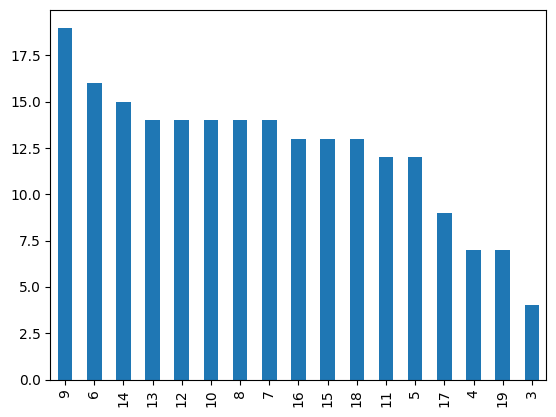

In [ ]:
news_beast_articles_df[news_beast_articles_df['day']>28]['hour'].value_counts().plot(kind='bar')

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text_a = news_beast_articles_df['Title'].str.cat(sep = ' ')#.replace("amp", ' ')
text_a

'Ζοζέπ Μπορέλ: Η Ρωσία δεν θα διαπραγματευτεί όσο προσπαθεί να κερδίσει τον πόλεμο στην Ουκρανία Survivor All Star: Σπόντες Καραγκούνια για την Μαριαλένα – «Εκεί είναι η πόρτα, την ανοίγεις και φεύγεις» Fake news και διχασμός με τη βοήθεια τεχνητής νοημοσύνης: Ο φόβος των Αμερικανών ενόψει των Προεδρικών Εκλογών του 2024 Αυτή είναι η χώρα με τα περισσότερα νησιά στον κόσμο – Η θέση που βρίσκεται η Ελλάδα Ο καγκελάριος Σολτς προσκαλεί τον Ερντογάν στο Βερολίνο «Είναι εθελόντρια και όχι ερπετολόγος», λέει η μητέρα της 39χρονης που δάγκωσε οχιά σε σχολείο της Θεσσαλονίκης Επιχείρησαν να εισαγάγουν στην Ελλάδα 2 κιλά κοκαΐνης – Εντοπίστηκαν εντός του σώματός τους Μεγάλες εκπλήξεις στη νέα κυβέρνηση της Τουρκίας – Οι δύο υπουργοί που παραμένουν στην καρέκλα τους «Βαρύ» όνομα για τον πάγκο του Ολυμπιακού – Πρόταση… Τσάβι Νικολέτα Βλαβιανού: Έμαθα ότι ο μπαμπάς μου πέθανε από ένα παιδάκι στο σχολείο Κυριάκος Μητσοτάκης: Επίσκεψη αύριο σε Λασίθι και Ηράκλειο Σοβαρή η κατάσταση του σκύλου που β

In [ ]:
import spacy

nlp = spacy.load('el_core_news_sm')

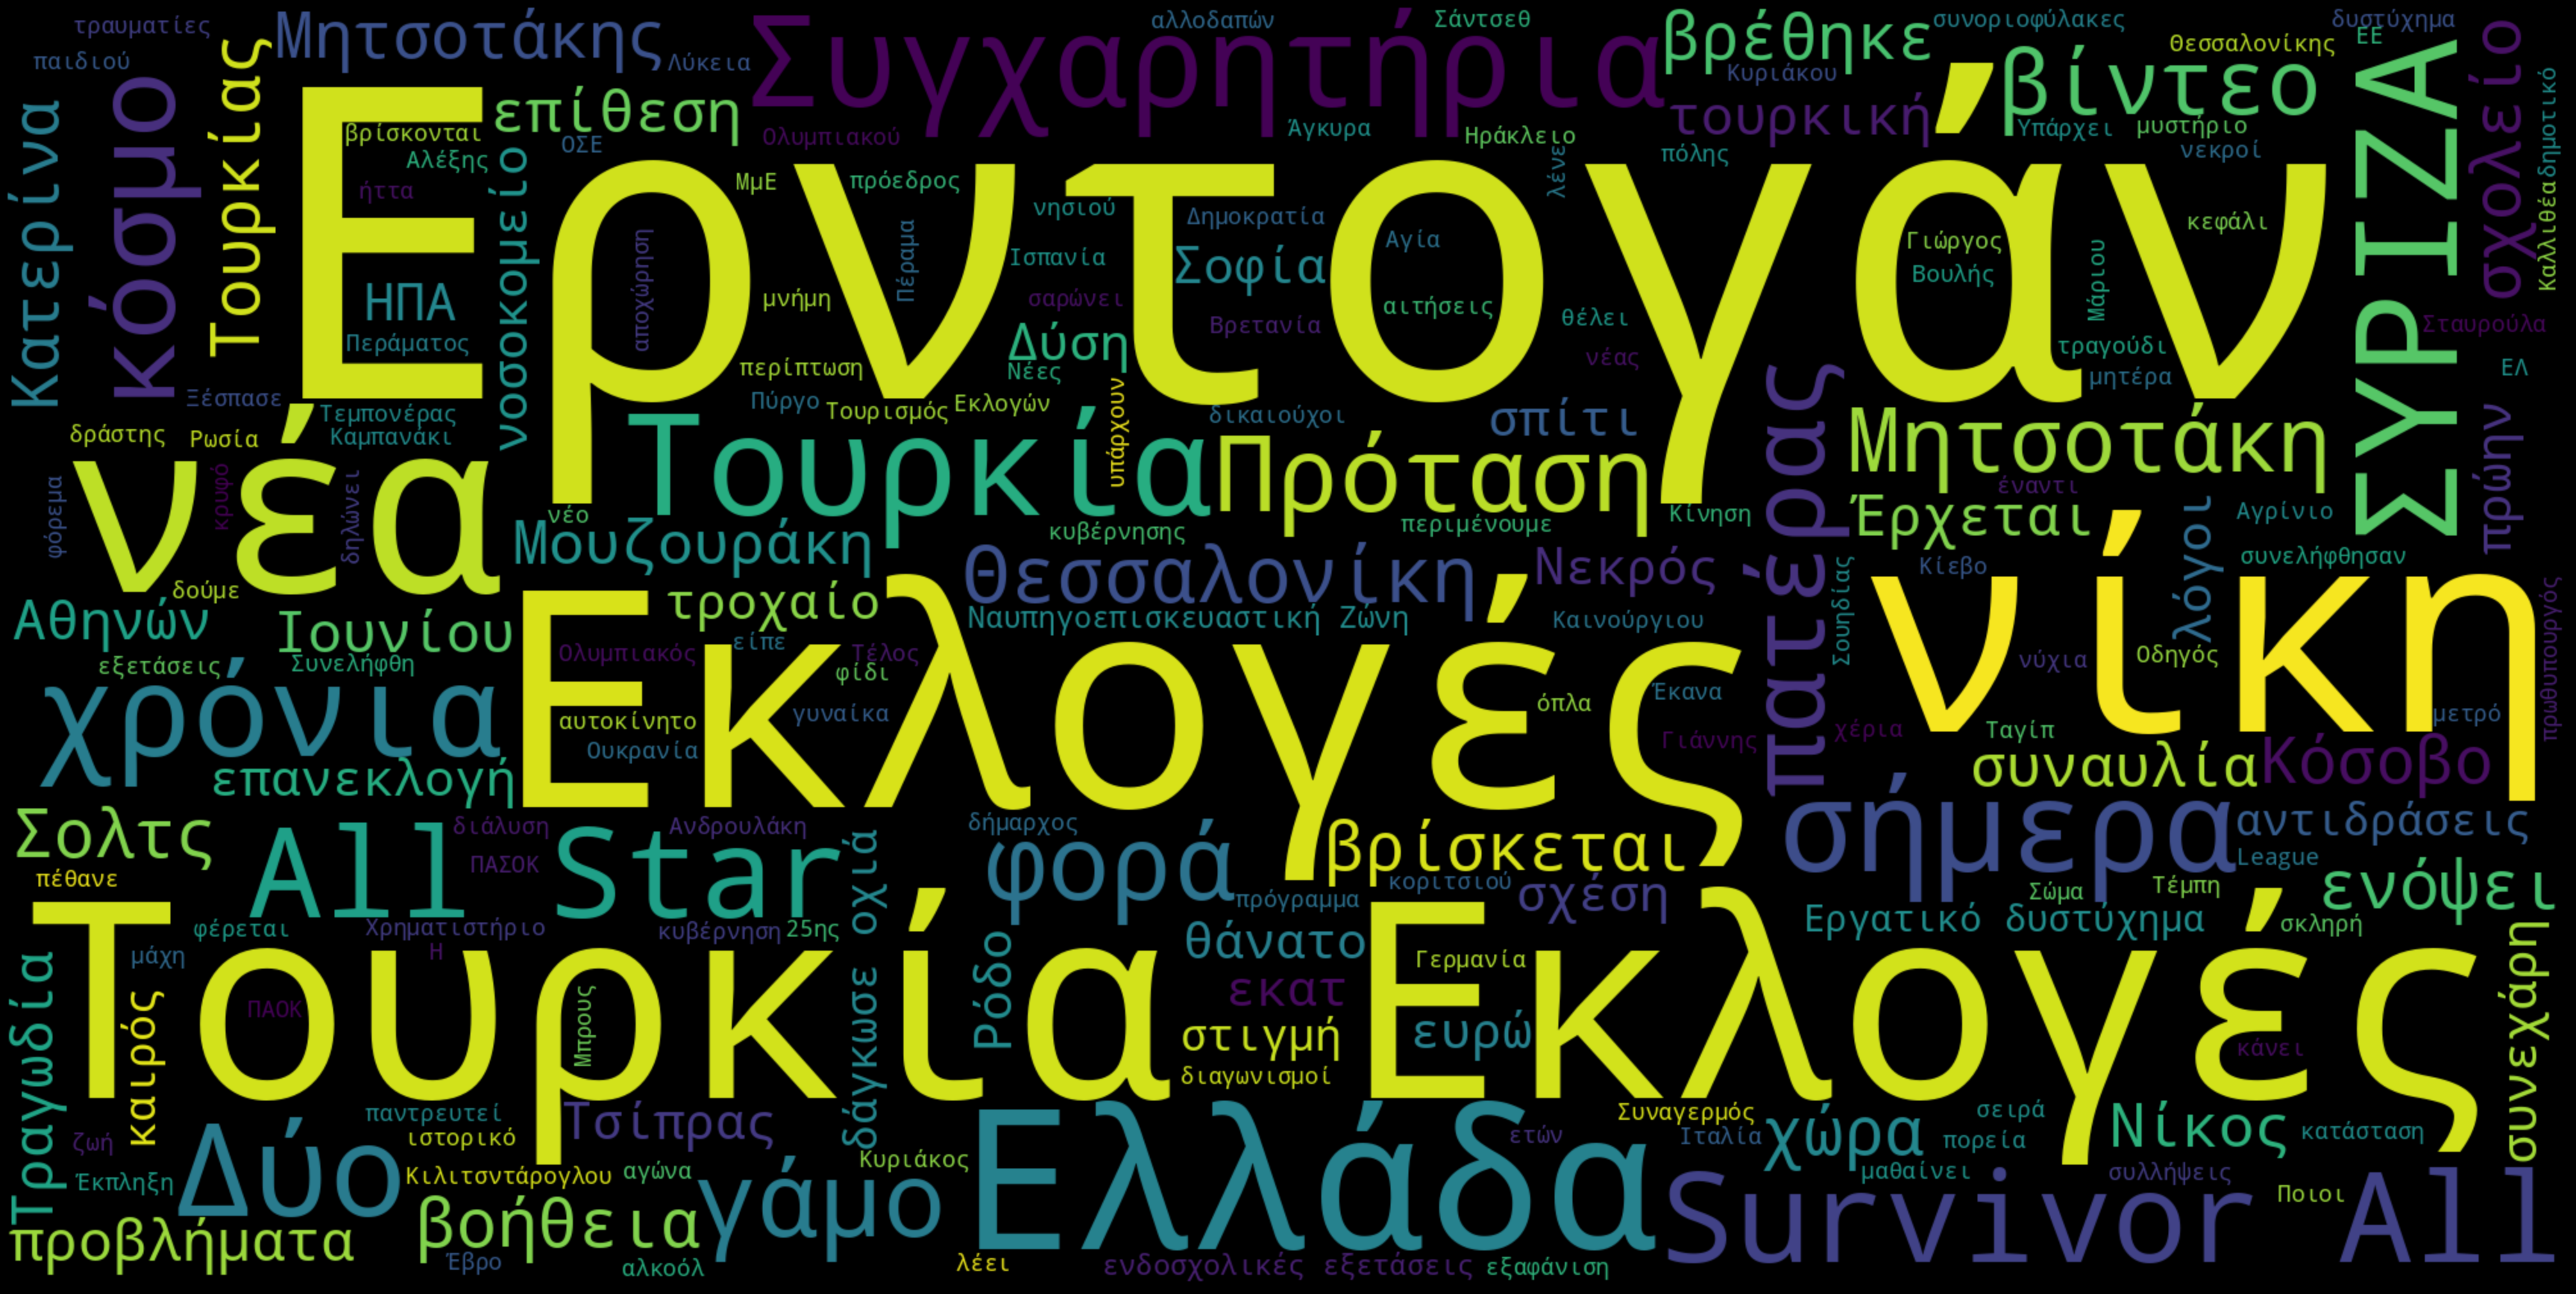

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
    ).generate(text_a)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
doc_a = nlp(text_a)
lemma_text_a = ' '.join(token.lemma_ for token in doc_a)

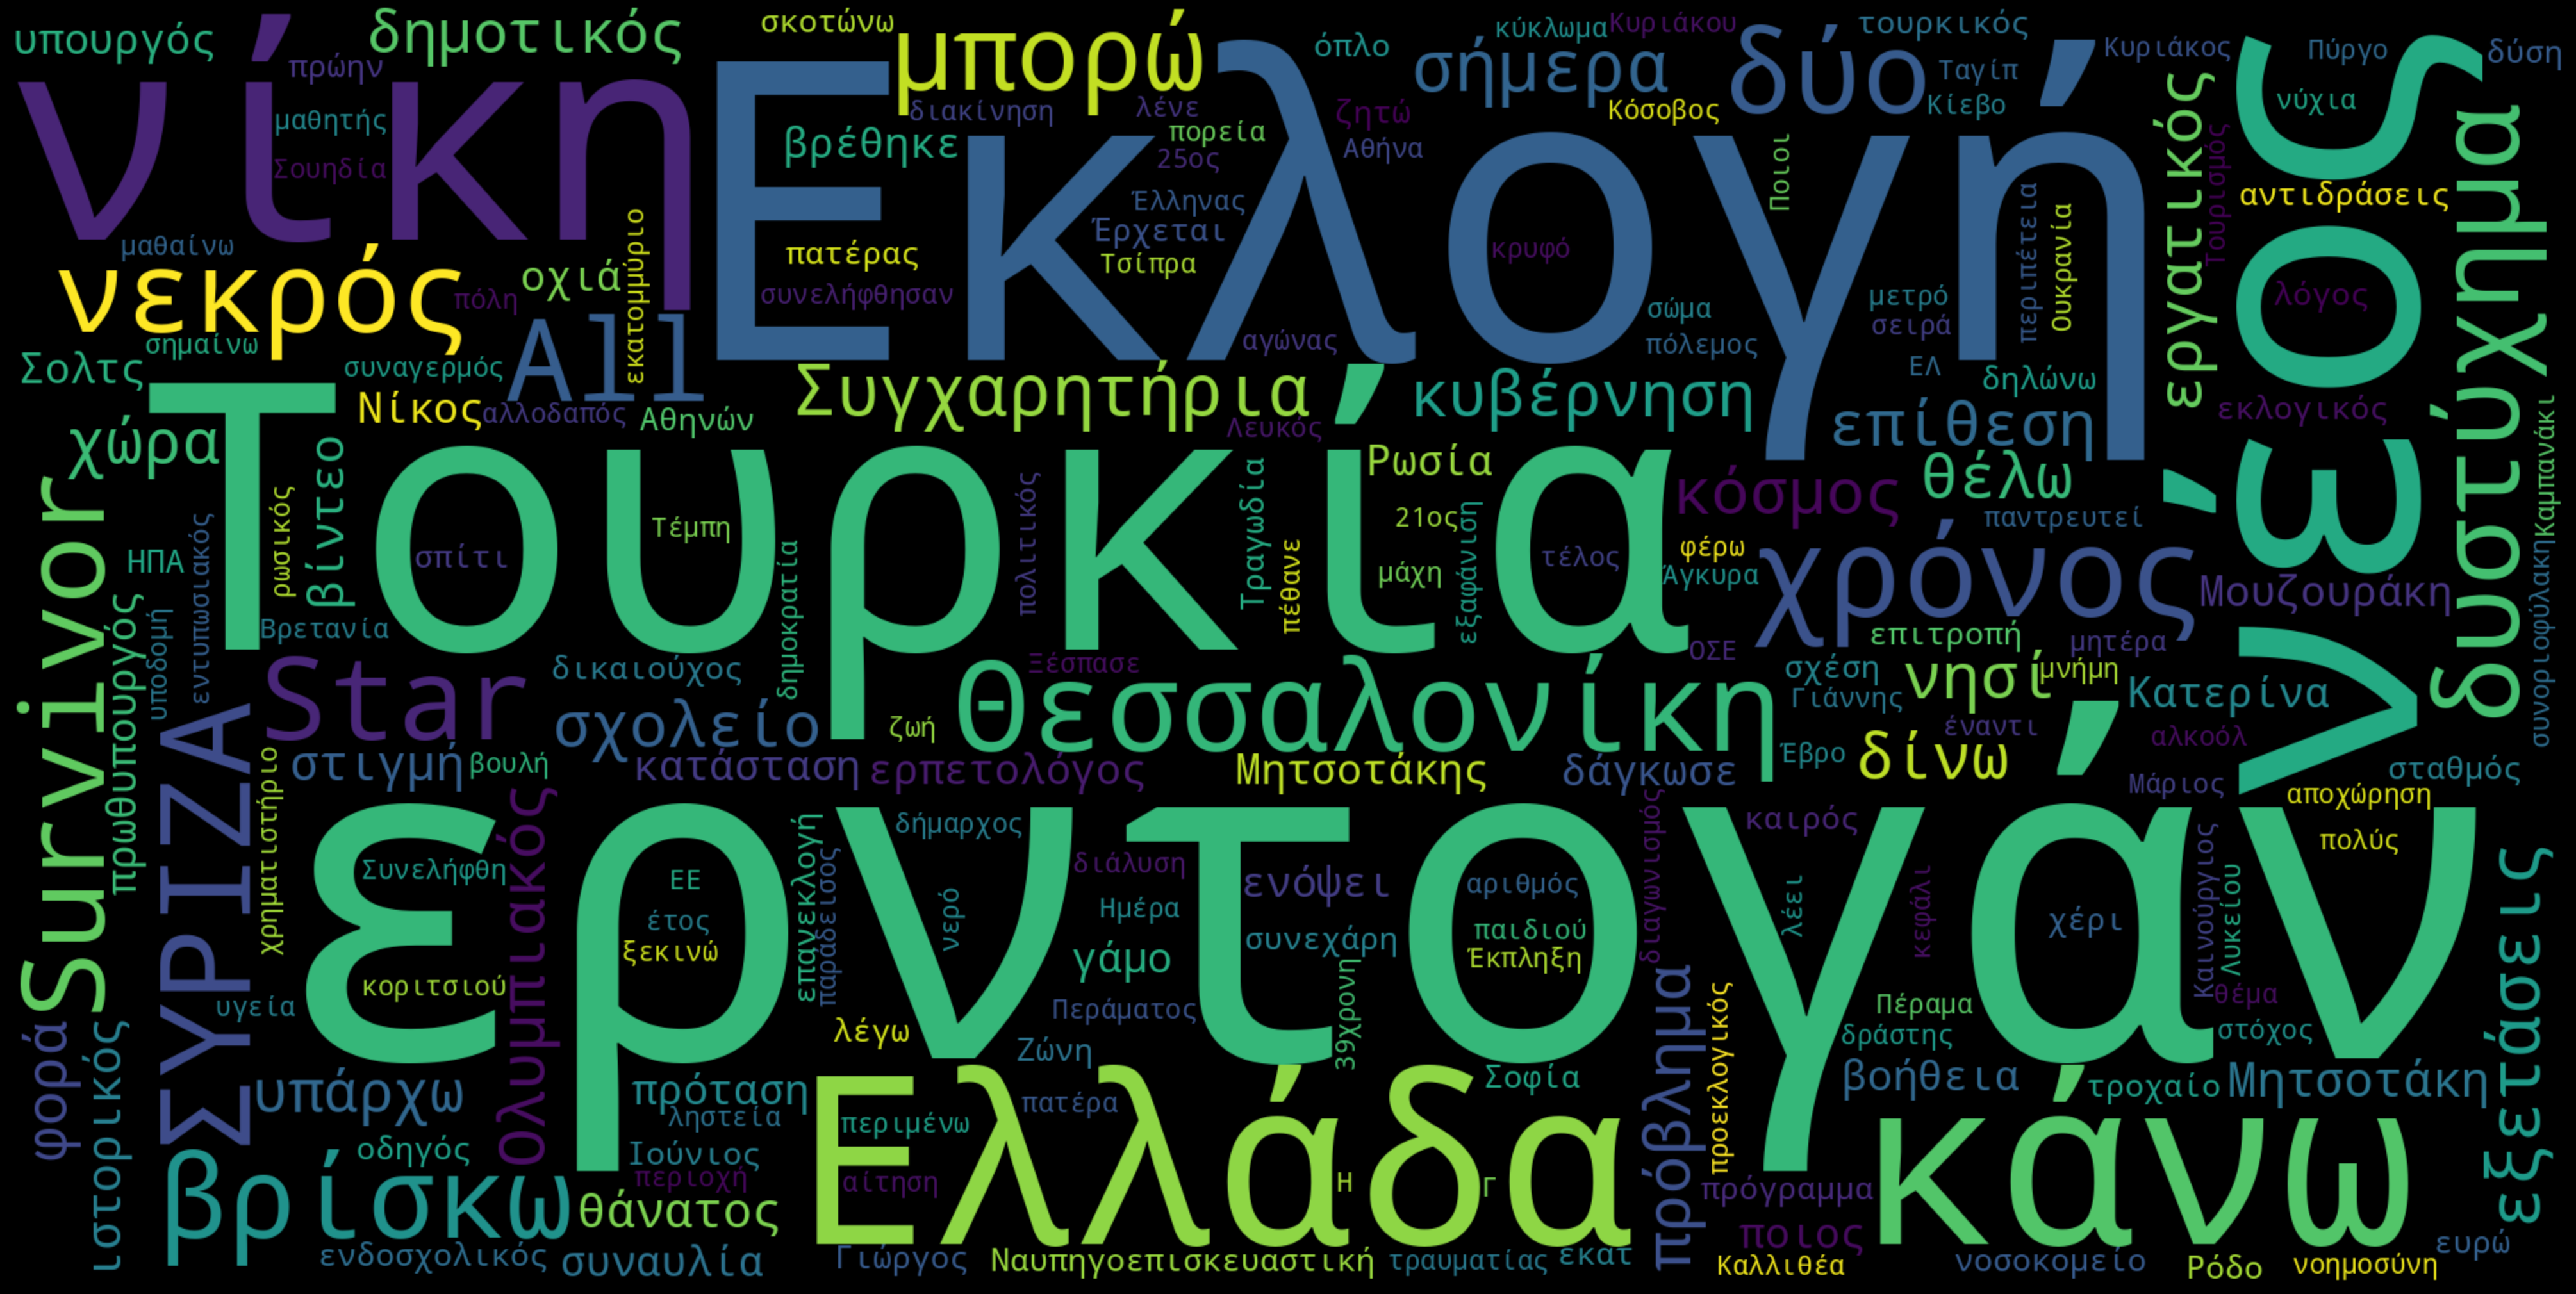

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    collocations=False,
    width = 2000,
    height = 1000,
    background_color = 'black'
    ).generate(lemma_text_a)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Στις 29/05/2023 παρατηρούμε πως αναρτήθηκαν 194 δημοσιογραφικά άρθρα στο site της newsbeast.gr. Τα περισσότερα από αυτά, κυκλοφόρησαν στις 9 π.μ. και ακολούθησαν και άλλες πρωινές-μεσημεριανές ώρες με μεγάλο ποσοστό αναρτήσεων καθιστώντας φανερό πως τα περισσότερα άρθρα δημοσιεύτηκαν κατά τη διάρκεια της πρωινής και μεσημεριανής ζώνης.
Όσον αφορά το περιεχόμενό τους, είναι φανερό πως θέμα μείζονος σημασίας αποτέλεσε ο Ερντογάν και συνεπώς η Τουρκία, αλλά και η Ελλάδα. Έπειτα ακολουθούν και άλλα θέματα τα οποία καλύφθηκαν εντός της 29ς Μαϊου, όπως οι εκλογές, άρθρα για τον ΣΥΡΙΖΑ και τον Μητσοτάκη και ατυχήματα-δυστυχήματα που συνέβησαν. Σαφώς και καταγράφηκαν και διάφορα άλλα θέματα στα οποία δόθηκε μικρότερη έκταση, όπως τα αθλητικά.